In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [66]:
import seaborn as sns
sns.set_context('poster')
rcParams['font.size']=18

In [2]:
from kid_readout import *
import equipment

In [3]:
ncf = NCFile('/artemis/readout/2016-04-15_152859_lo_1110.0.nc',cache_s21_raw=True)

In [4]:
mmwsl = ncf.MMWSweepList0

In [5]:
df = mmwsl.to_dataframe()

In [22]:
ncf.close()

In [23]:
ncf = NCFile('/artemis/readout/2016-04-15_154625_lo_1570.0.nc',cache_s21_raw=True)
mmwsl = ncf.MMWSweepList0
df2 = mmwsl.to_dataframe()
ncf.close()

In [25]:
import pandas as pd

In [26]:
df = pd.concat([df,df2],ignore_index=True)

In [27]:
df.shape

(64, 64)

In [28]:
df['resonator_index'] = df.number + 32*(df.res_f_0 > 1.4e9)

In [11]:
folded.shape

(500, 256)

In [8]:
x = df.folded_x.iloc[0]

In [12]:
period = x.shape[-1]
on = x[...,period//8:3*period//8].mean(-1)
off = x[...,5*period//8:7*period//8].mean(-1)


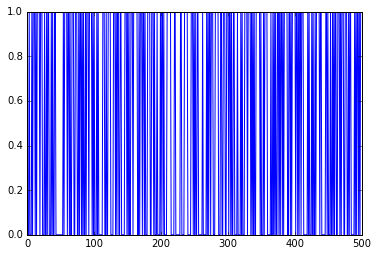

In [13]:
plot(on>off)

In [11]:
on.shape

(500,)

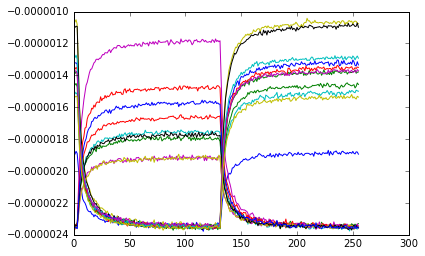

In [9]:
_ = plot(x[200:220,:].T)

In [38]:
def ppm_per_pw(df,low=140e9,high=160e9):
    result = []
    for k,row in df.iterrows():
        ppmppw = row.fractional_frequency_response/row.zbd_power_linearized
        mask = (row.mmw_frequency > low) & (row.mmw_frequency < high)
        result.append(ppmppw[mask].mean())
    return np.array(result)

In [39]:
df['band_averaged_response'] = ppm_per_pw(df)

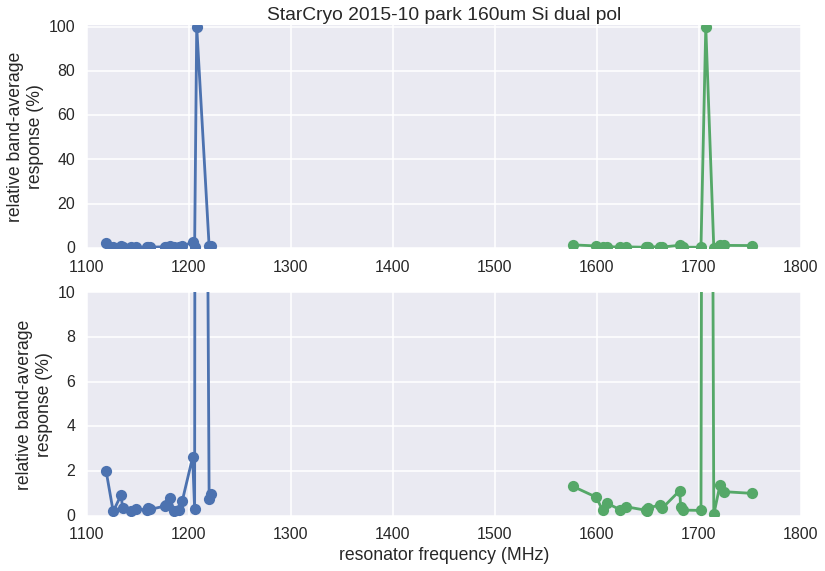

In [80]:
dd = df[df.number < 20]
pola = dd[dd.res_f_0<1.4e9]
polb = dd[dd.res_f_0>1.4e9]
subplot(211)
plot(pola.res_f_0/1e6,100*pola.band_averaged_response/pola.band_averaged_response.max(),'o-')
plot(polb.res_f_0/1e6,100*polb.band_averaged_response/polb.band_averaged_response.max(),'o-')
ylim(0,101)
ylabel('relative band-average\nresponse (%)')
title('StarCryo 2015-10 park 160um Si dual pol')
subplot(212)
plot(pola.res_f_0/1e6,100*pola.band_averaged_response/pola.band_averaged_response.max(),'o-')
plot(polb.res_f_0/1e6,100*polb.band_averaged_response/polb.band_averaged_response.max(),'o-')
ylabel('relative band-average\nresponse (%)')
ylim(0,10)

xlabel('resonator frequency (MHz)')


In [51]:
def ppm_per_pw_array(df,low=140e9,high=160e9):
    result = []
    for k,row in df.iterrows():
        ppmppw = row.fractional_frequency_response/row.zbd_power_linearized
        mask = (row.mmw_frequency > low) & (row.mmw_frequency < high)
        result.append(ppmppw[mask])
    return row.mmw_frequency[mask],np.array(result)

In [52]:
fr,ppa = ppm_per_pw_array(dd)

In [49]:
dd.shape

(40, 65)

In [56]:
ppa.shape

(40, 399)

In [57]:
fr.shape

(399,)

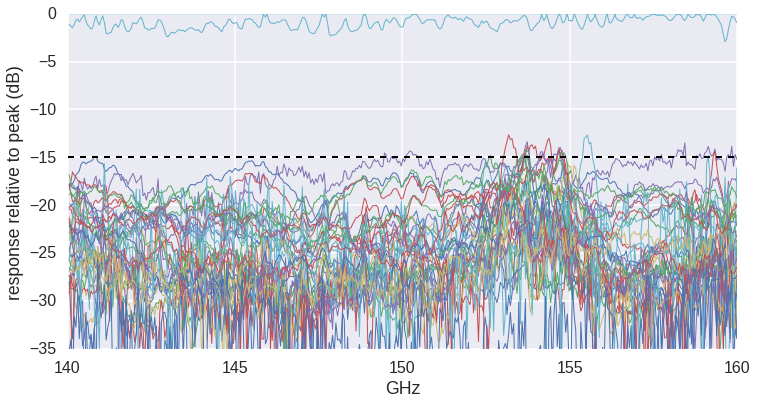

In [69]:
figure(figsize=(12,6))
_=plot(fr/1e9,10*np.log10((ppa/ppa.max(0)).T),lw=1)
ylim(-35,0)
axhline(-15,lw=2,linestyle='--',color='k')
xlabel('GHz')
ylabel('response relative to peak (dB)')

(140, 160)

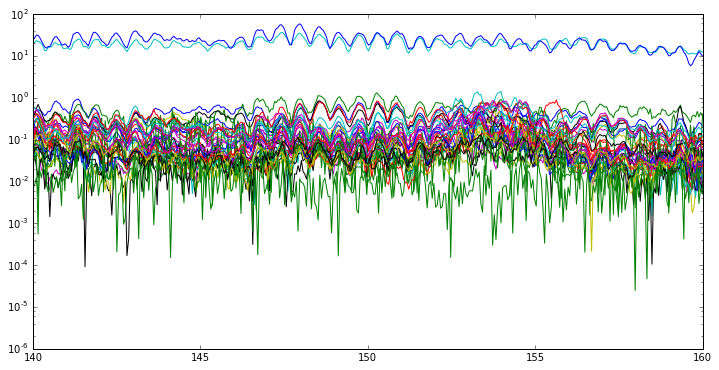

In [50]:
figure(figsize=(12,6))
for k,row in dd.iterrows():
    semilogy(row.mmw_frequency/1e9,row.fractional_frequency_response/row.zbd_power_linearized)
xlim(140,160)


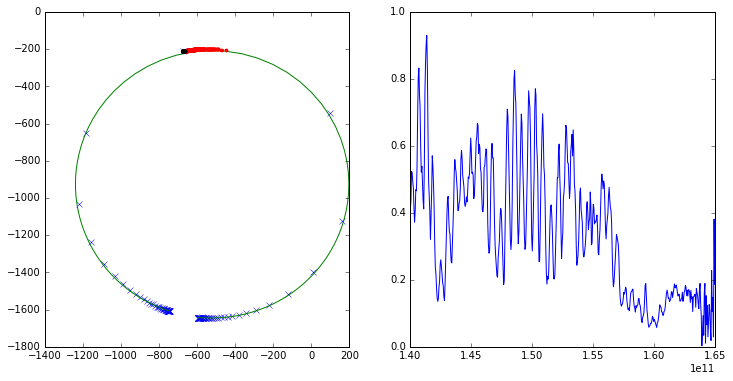

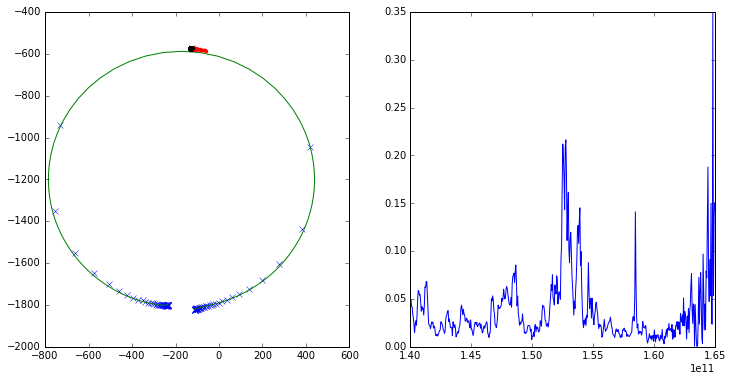

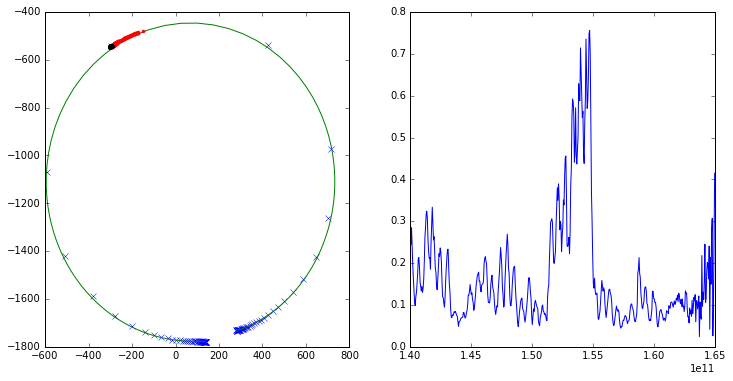

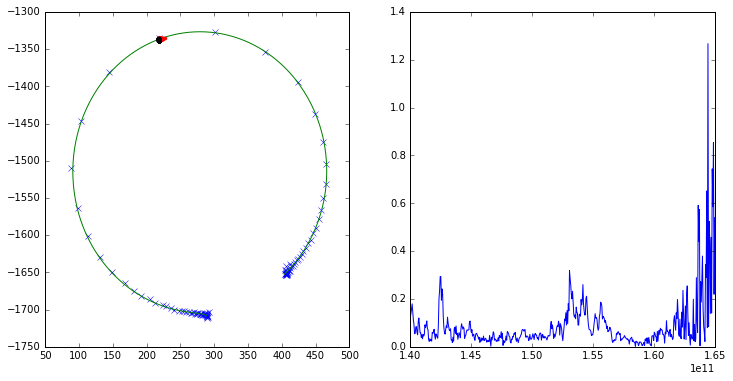

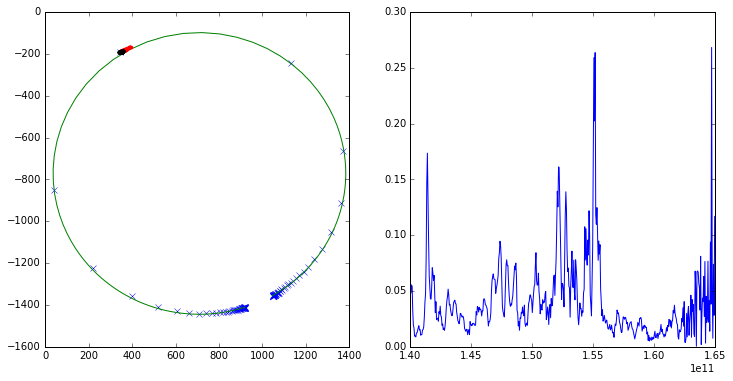

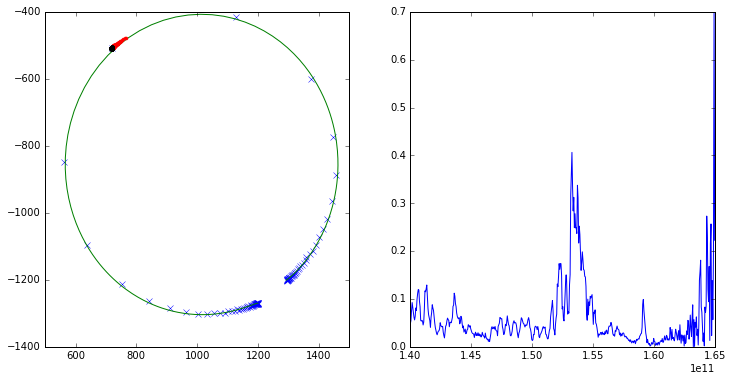

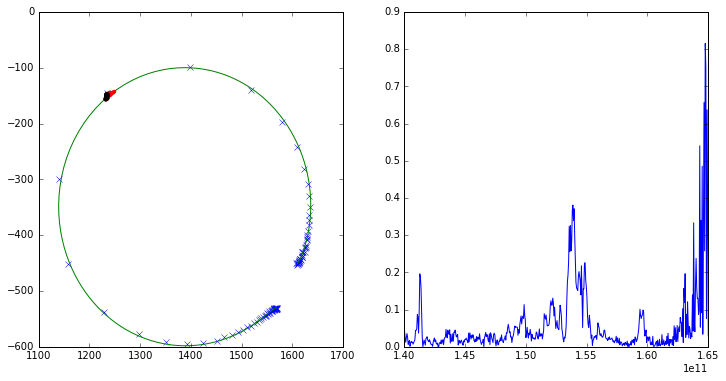

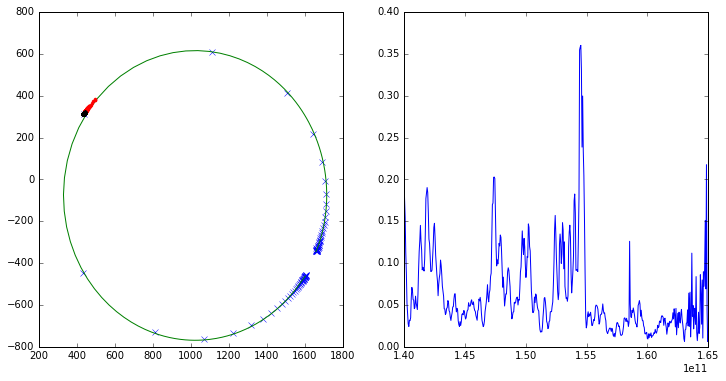

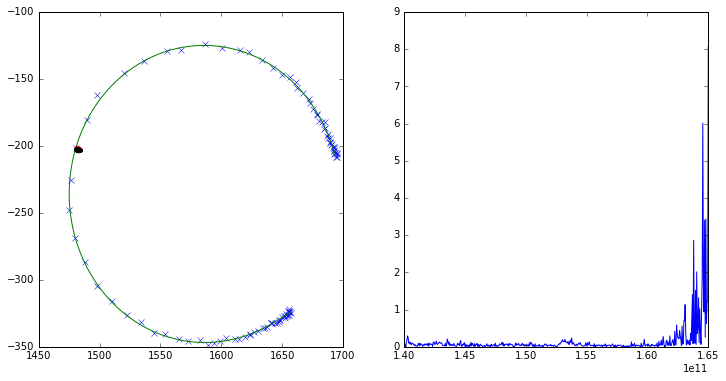

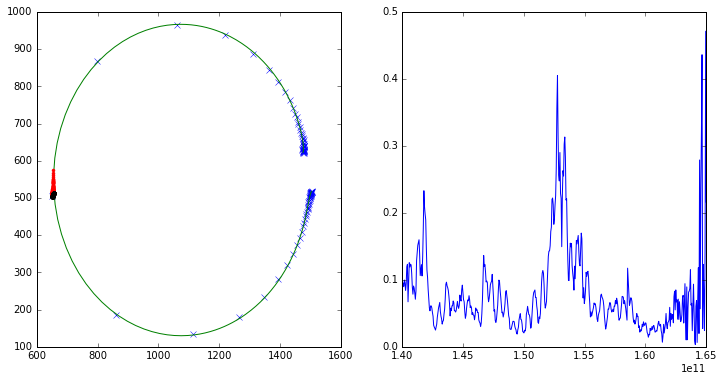

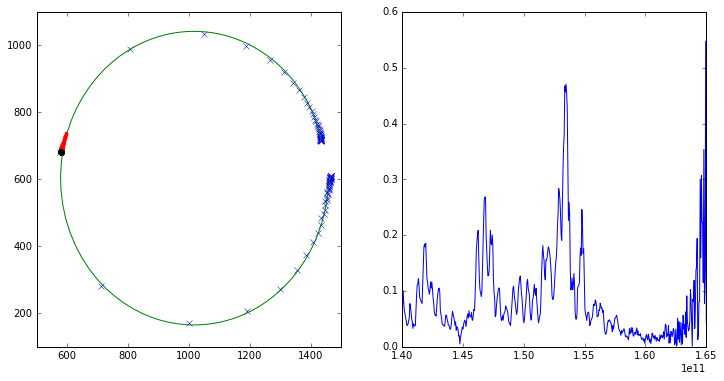

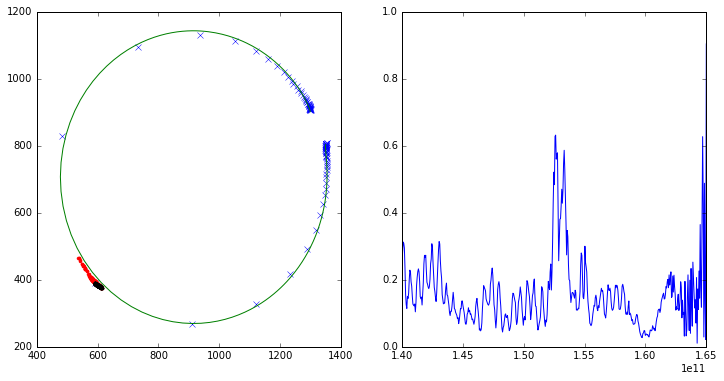

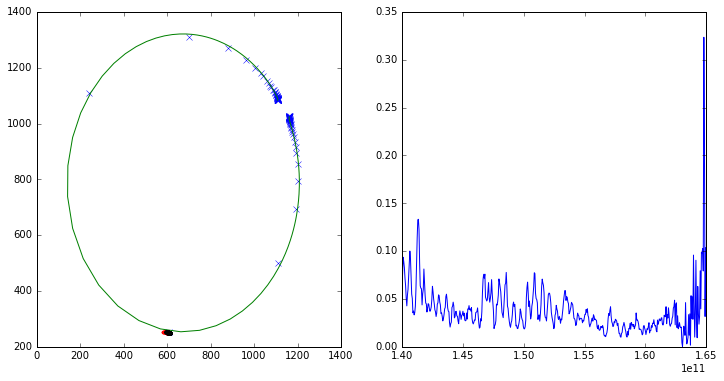

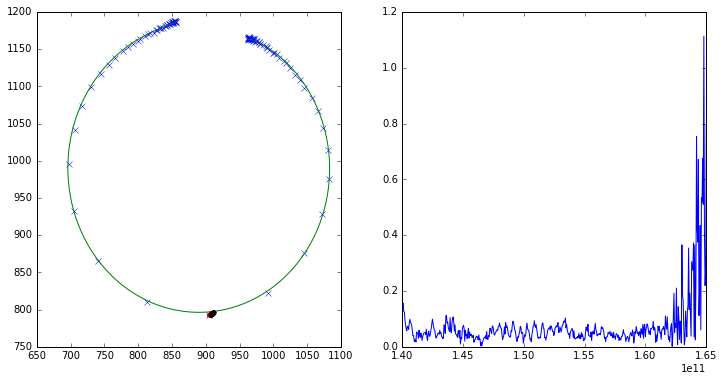

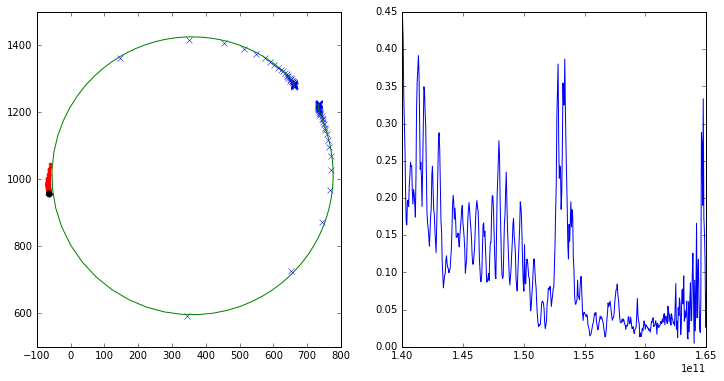

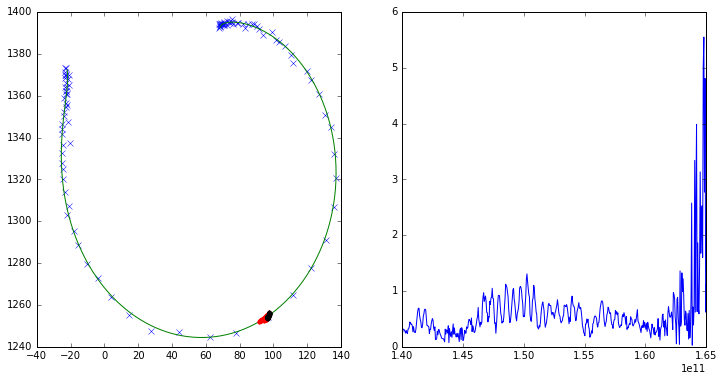

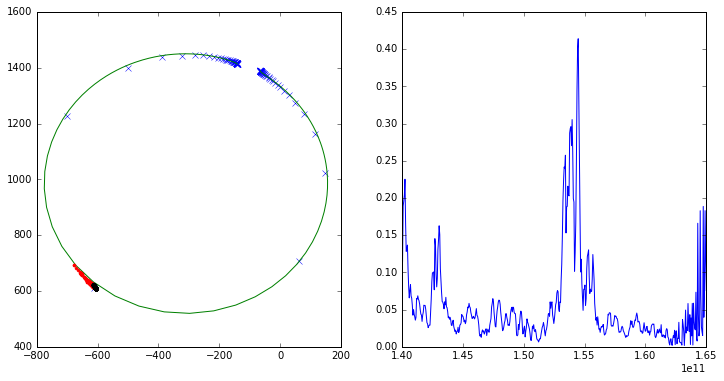

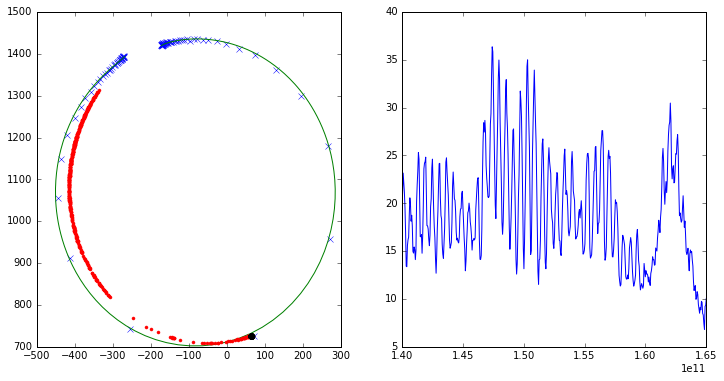

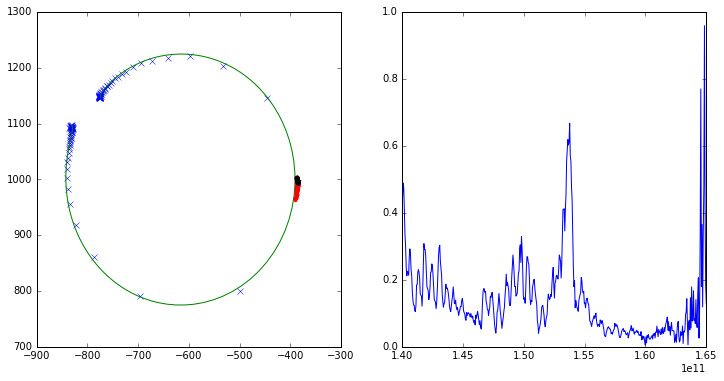

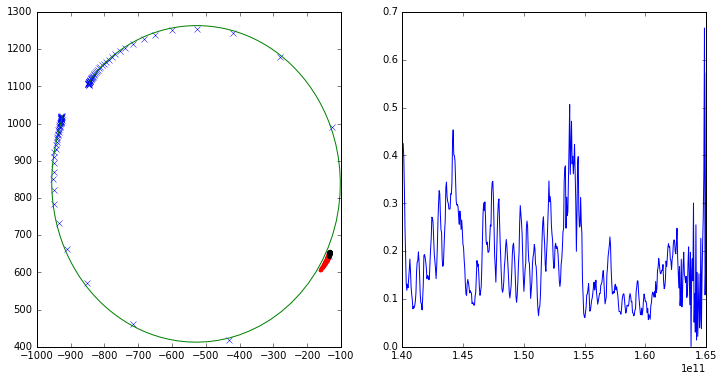

In [14]:
for k,row in df.iterrows():
    if row.number < 20:
        fig,(ax1,ax2) = subplots(1,2,figsize=(12,6))
        ax1.plot(row.res_s21_data.real,row.res_s21_data.imag,'x')
        ax1.plot(row.res_model_s21.real,row.res_model_s21.imag)
        folded = row.folded_s21_raw
        period = folded.shape[-1]
        first = folded[...,period//8:3*period//8].mean(-1)
        second = folded[...,period*5//8:7*period//8].mean(-1)
        x = row.folded_x
        x1 = x[...,period//8:3*period//8].mean(-1)
        x2 = x[...,5*period//8:7*period//8].mean(-1)
        on = np.where(x1>x2,first,second)
        off = np.where(x1<=x2,first,second)
        ax1.plot(on.real,on.imag,'r.')
        ax1.plot(off.real,off.imag,'k.')
        ax2.plot(row.mmw_frequency,row.fractional_frequency_response/row.zbd_power_linearized)
    

In [8]:
mmw0 = mmwsl.single_sweep_stream_list(17)

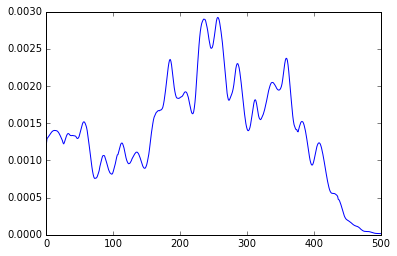

In [9]:
plot(mmw0.state_vector('lockin','rms_voltage'))

In [18]:
(np.multiply.outer(np.array([1,2,5]),10.**np.arange(-9,1)).T.flatten()[1:-2])[16]

0.00050000000000000001

In [19]:
import pandas as pd

In [22]:
a = pd.DataFrame(dict(a=1,b=[np.arange(10)]),index=[0])

In [7]:
mmw0.zbd_power

<bound method MMWResponse.zbd_power of <kid_readout.measurement.mmw_source_sweep.MMWResponse object at 0x7f0ad4660e10>>

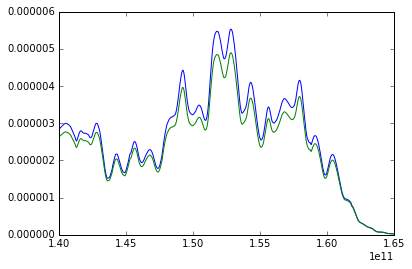

In [8]:
plot(mmw0.mmw_frequency,(mmw0.zbd_power()))
plot(mmw0.mmw_frequency,(mmw0.zbd_power(linearize=True)))
#plot(mmw0.mmw_frequency,(mmw0.zbd_voltage()/2300))
#yscale('log')

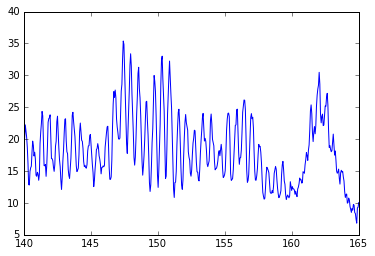

In [10]:
plot(mmw0.mmw_frequency/1e9,mmw0.fractional_frequency_response*1e6/(1e6*mmw0.zbd_power()))

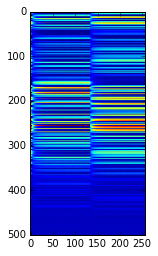

In [6]:
imshow(mmw0.folded_x())

In [7]:
stream = mmw0.stream_list[0]

In [8]:
stream.state

{u'hittite': {u'frequency': 11666666666.666666,
  u'output_on': True,
  u'power_dBm': 0},
 u'lockin': {u'rms_voltage': 0.0012111699999999999},
 u'mmwave_source': {u'after_multiplier': u'bpf_140_160_GHz',
  u'before_multiplier': None,
  u'mickey_ticks': 175.0,
  u'minnie_ticks': 175.0,
  u'multiplier_factor': 12.0,
  u'multiplier_input': u'hittite',
  u'ttl_modulation_source': u'roach',
  u'waveguide_twist_angle': 45}}

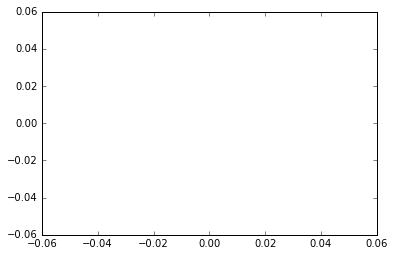

In [11]:
plot(mmw0.lockin_voltage)

In [14]:
ssl = mmw0.sweep_stream_list()

AttributeError: 'SingleSweep' object has no attribute 'resonator'